### Business Understanding:
Airbnb listings in the UK and performs some data cleaning and exploratory analysis to answer some questions such as:

1. What is the most common room type and its percentage in the dataset?
2. What is the average price by room type?
3. What are the top 10 neighborhoods with the highest average price?
4. Is there any relationship between the number of reviews and the availability of the listings?
5. Is there any relationship between the reviews_per_month and the average price?

### Data Understanding:

The dataset contains information on Airbnb listings in the UK as of July 2021. It includes various features such as the name of the city, the neighborhood, the type of room, the price, the number of reviews, and the availability, among others. The data is structured in a tabular format, with each row representing a unique listing and each column representing a specific attribute of that listing.

The data was collected from publicly available listings on the Airbnb website and was subsequently made available for research purposes. The dataset contains a total of 2260 listings across various cities and neighborhoods in the UK.

To gain a better understanding of the dataset, various exploratory data analysis (EDA) techniques can be applied. This includes examining the distribution of the features, identifying any outliers or missing values, and looking for correlations between different variables. This information can then be used to answer business questions and gain insights into the Airbnb market in the UK.

### Data Preparation:

Here are the steps taken in data preparation:

	Import necessary libraries: pandas, pandas_profiling, ydata_profiling, sketch, matplotlib.pyplot, seaborn, and sklearn.impute.

	Read the CSV file into a pandas DataFrame called "df."

	Generate a report on the DataFrame using pandas_profiling and save it to an HTML file called "report.html."

	Print the information about the DataFrame using the info() method to understand the structure of the DataFrame.

	Drop two columns, "neighbourhood_group" and "license," that have no values or no longer needed using the drop() method.

	Convert the "last_review" column to a datetime type using the to_datetime() method.

	Check for any missing values in the "last_review" column using the isnull() and sum() methods. If missing values exist, replace them with the mean value of the column using the SimpleImputer class.

	Check for any missing values in the "reviews_per_month" column using the isnull() and sum() methods. If missing values exist, replace them with the mean value of the column.

	Group the DataFrame by "neighbourhood" and calculate the mean price for each group.

	The code then conducts EDA to explore the dataset using the following steps:

	Calculate the most common room type and its percentage in the dataset using the value_counts() method and rounding the percentage to two decimal places.

	Create a scatter plot to visualize the relationship between "number_of_reviews" and "availability_365" using seaborn.scatterplot() method.

	Calculate the average price per room type and plot it in a bar chart using the groupby() and bar() methods.

	Group the DataFrame by "neighbourhood" and calculate the mean price for each group. Sort the neighbourhoods by average price in descending order and take the top 10. Print the top 10 neighbourhoods and their average price. Create a scatter plot to visualize the relationship between "number_of_reviews" and "availability_365."


### Modeling:
No modeling is performed in this code.

### Evaluation:
The results of the exploratory analysis are printed and visualized using different types of charts such as scatter plots and bar plots.

### Deployment:
No deployment is performed in this code.

# CODE

In [21]:
import pandas as pd
from pandas_profiling import ProfileReport
import ydata_profiling
import sketch
import matplotlib.pyplot as plt
# Import the SimpleImputer class from the sklearn.impute module
from sklearn.impute import SimpleImputer

%matplotlib inline

In [22]:
df = pd.read_csv('abnbuklistings.csv')

In [23]:
# Count the number of rows (listings) in the DataFrame
print(len(df))

2260


In [24]:
# design_report = ProfileReport(df)
# design_report.to_file(output_file='report.html')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2260 non-null   int64  
 1   name                            2260 non-null   object 
 2   host_id                         2260 non-null   int64  
 3   host_name                       2260 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2260 non-null   object 
 6   latitude                        2260 non-null   float64
 7   longitude                       2260 non-null   float64
 8   room_type                       2260 non-null   object 
 9   price                           2260 non-null   int64  
 10  minimum_nights                  2260 non-null   int64  
 11  number_of_reviews               2260 non-null   int64  
 12  last_review                     19

In [26]:
# drop neighbourhood_group column since it has no values

# Check if the 'neighbourhood_group' column exists in the DataFrame
if 'neighbourhood_group' in df.columns:
    # Drop the 'neighbourhood_group' column
    df.drop('neighbourhood_group', axis=1, inplace=True)
    # Print the updated DataFrame to verify that the column was dropped
    print("The 'neighbourhood_group' column was dropped successfully.\n")
else:
    print("The 'neighbourhood_group' column seems to be already dropped.\n")

The 'neighbourhood_group' column was dropped successfully.



In [27]:
# drop neighbourhood_group column since it has no values

# Check if the 'neighbourhood_group' column exists in the DataFrame
if 'license' in df.columns:
    # Drop the 'neighbourhood_group' column
    df.drop('license', axis=1, inplace=True)
    # Print the updated DataFrame to verify that the column was dropped
    print("The 'license' column was dropped successfully.\n")
else:
    print("The 'license' column seems to be already dropped.\n")

The 'license' column was dropped successfully.



In [28]:

# Convert the 'last_review' column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Print the data types of the columns to verify that the 'last_review' column is now a datetime type
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object


In [29]:
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,51.43994,-2.59173,Private room,41,3,179,2022-09-22,1.60,5,0,19
1,117122,City Centre-Waterside Retreat,591555,Marcus,Clifton,51.45051,-2.61054,Private room,96,1,172,2022-12-11,1.23,1,357,18


In [30]:
# Check if there are any missing values in 'last_review' column
if df['last_review'].isnull().sum() == 0:
    print("There are no missing values in 'last_review' column")
else:
    print("There are still missing values in 'last_review' column")

There are still missing values in 'last_review' column


In [31]:

# Create an instance of the SimpleImputer class with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'last_review' column and transform the data
df['last_review'] = imputer.fit_transform(df[['last_review']])

In [32]:
# Test the code by checking if there are any missing values in 'last_review' column
assert df['last_review'].isnull().sum() == 0

In [33]:
# Check if there are any missing values in 'last_review' column
if df['last_review'].isnull().sum() == 0:
    print("There are no missing values in 'last_review' column")
else:
    print("There are still missing values in 'last_review' column")

There are no missing values in 'last_review' column


In [34]:
# Check if there are any missing values in 'last_review' column
if df['reviews_per_month'].isnull().sum() == 0:
    print("There are no missing values in 'reviews_per_month' column")
else:
    print("There are still missing values in 'reviews_per_month' column")

There are still missing values in 'reviews_per_month' column


In [35]:
# Calculate the mean of non-missing values in the reviews_per_month column
mean_reviews_per_month = df['reviews_per_month'].mean()

# Replace missing values with the mean value
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

In [36]:
# Check if there are any missing values in 'last_review' column
if df['reviews_per_month'].isnull().sum() == 0:
    print("There are no missing values in 'reviews_per_month' column")
else:
    print("There are still missing values in 'reviews_per_month' column")

There are no missing values in 'reviews_per_month' column


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2260 non-null   int64  
 1   name                            2260 non-null   object 
 2   host_id                         2260 non-null   int64  
 3   host_name                       2260 non-null   object 
 4   neighbourhood                   2260 non-null   object 
 5   latitude                        2260 non-null   float64
 6   longitude                       2260 non-null   float64
 7   room_type                       2260 non-null   object 
 8   price                           2260 non-null   int64  
 9   minimum_nights                  2260 non-null   int64  
 10  number_of_reviews               2260 non-null   int64  
 11  last_review                     2260 non-null   float64
 12  reviews_per_month               22

### Question1- What is the average price of listings in each neighborhood in the dataset?

In [38]:
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()
print(avg_price_by_neighbourhood.head(5))


                 neighbourhood       price
0                       Ashley  120.178832
1  Avonmouth & Lawrence Weston  111.212766
2                   Bedminster   93.240741
3     Bishopston & Ashley Down  177.621212
4                 Bishopsworth   78.416667


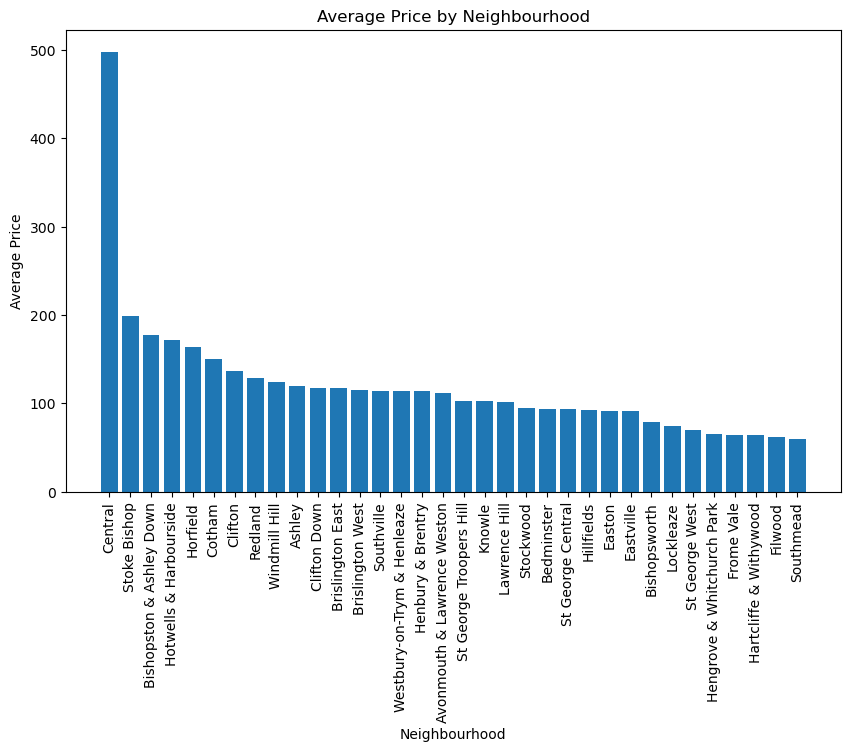

In [39]:

# Group by neighbourhood and calculate mean price
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by average price
avg_price_by_neighbourhood = avg_price_by_neighbourhood.sort_values(by='price', ascending=False)

# Plot the chart
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_neighbourhood['neighbourhood'], avg_price_by_neighbourhood['price'])
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.show()


### Question 2: What is the most common room type and its percentage in the dataset?

In [40]:
room_type_counts = df['room_type'].value_counts(normalize=True)
most_common_room_type = room_type_counts.index[0]
percentage = round(room_type_counts[0]*100,2)

print("Most common room type is", most_common_room_type, "which makes up", percentage, "% of the dataset.")


Most common room type is Entire home/apt which makes up 63.41 % of the dataset.


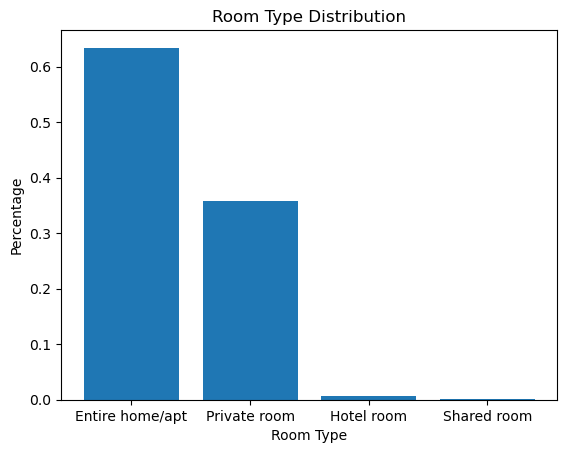

Most common room type is Entire home/apt which makes up 63.41 % of the dataset.


In [47]:
# Get room type counts
room_type_counts = df['room_type'].value_counts(normalize=True)

# Get most common room type and percentage
most_common_room_type = room_type_counts.index[0]
percentage = round(room_type_counts[0]*100,2)

# Plot bar chart
plt.bar(room_type_counts.index, room_type_counts.values)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Percentage")
plt.show()

# Print results
print("Most common room type is", most_common_room_type, "which makes up", percentage, "% of the dataset.")






In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2260 non-null   int64  
 1   name                            2260 non-null   object 
 2   host_id                         2260 non-null   int64  
 3   host_name                       2260 non-null   object 
 4   neighbourhood                   2260 non-null   object 
 5   latitude                        2260 non-null   float64
 6   longitude                       2260 non-null   float64
 7   room_type                       2260 non-null   object 
 8   price                           2260 non-null   int64  
 9   minimum_nights                  2260 non-null   int64  
 10  number_of_reviews               2260 non-null   int64  
 11  last_review                     2260 non-null   float64
 12  reviews_per_month               22

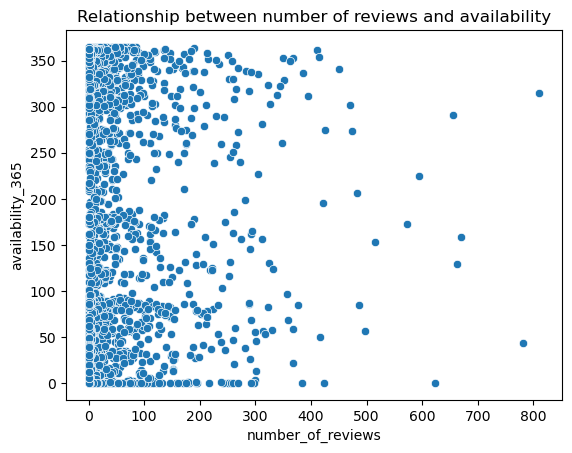

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='number_of_reviews', y='availability_365', data=df)
plt.title('Relationship between number of reviews and availability')
plt.show()


The scatterplot shows the relationship between the number of reviews and the availability of listings in the dataset. It appears that there is no clear correlation between the two variables, as the points on the plot are spread out with no clear pattern. There are some areas where there are many points clustered together, which could indicate popular listings with high availability and many reviews, but this is not a clear trend throughout the plot. Overall, the scatterplot suggests that the number of reviews and availability are not strongly correlated in this dataset.

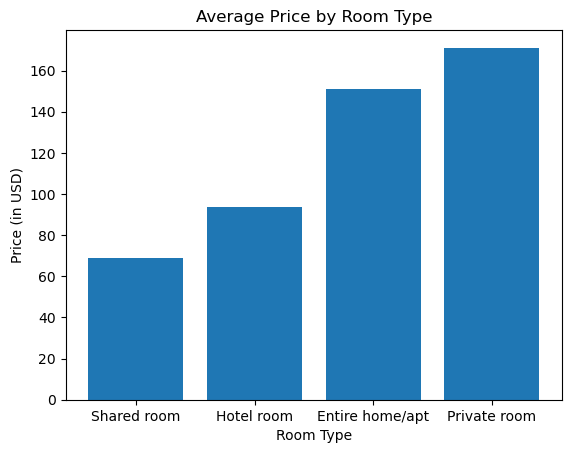

room_type
Shared room         69.000000
Hotel room          93.750000
Entire home/apt    151.265876
Private room       171.145679
Name: price, dtype: float64


In [43]:
# Find the average price per room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

# Create a bar plot to visualize the results
plt.bar(avg_price_by_room_type.index, avg_price_by_room_type.values)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (in USD)')
plt.show()

# Print the average price by room type
print(avg_price_by_room_type)

In [44]:
# Group by neighbourhood and calculate the mean price
neighbourhood_prices = df.groupby('neighbourhood')['price'].mean()

# Sort the neighbourhoods by average price in descending order and take top 10
top_neighbourhoods = neighbourhood_prices.sort_values(ascending=False).head(10)

# Print the top 10 neighbourhoods and their average price
print(top_neighbourhoods)


neighbourhood
Central                     497.527197
Stoke Bishop                198.888889
Bishopston & Ashley Down    177.621212
Hotwells & Harbourside      171.842857
Horfield                    164.250000
Cotham                      150.101852
Clifton                     137.129870
Redland                     128.358025
Windmill Hill               124.197674
Ashley                      120.178832
Name: price, dtype: float64


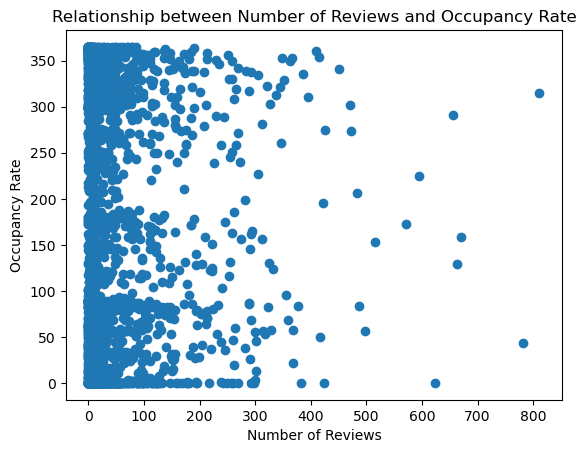

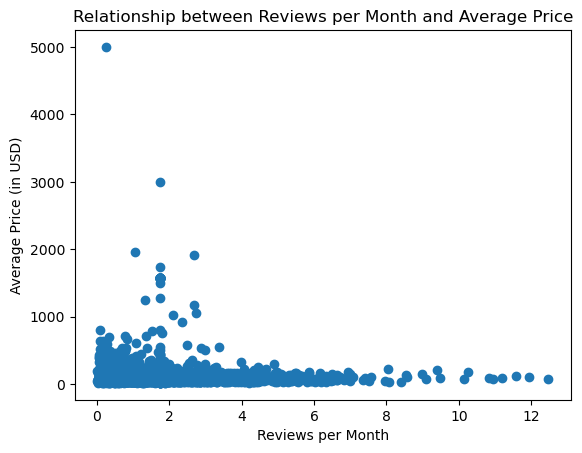

In [45]:
# Create a scatter plot to visualize the relationship between number_of_reviews and occupancy rate
plt.scatter(df['number_of_reviews'], df['availability_365'])
plt.title('Relationship between Number of Reviews and Occupancy Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Occupancy Rate')
plt.show()

# Create a scatter plot to visualize the relationship between reviews_per_month and average price
plt.scatter(df['reviews_per_month'], df['price'])
plt.title('Relationship between Reviews per Month and Average Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Average Price (in USD)')
plt.show()
